In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 6489-7534

 Directory of C:\Users\Dell\Desktop\New folder

14-01-2023  17:46    <DIR>          .
14-01-2023  12:23    <DIR>          ..
14-01-2023  17:46    <DIR>          .ipynb_checkpoints
28-12-2022  13:08             2,436 50_Startups (1).csv
26-12-2022  17:18             2,436 50_Startups.csv
11-01-2023  21:19           754,033 50strtup.ipynb
14-01-2023  16:32            46,094 assbook.csv
14-01-2023  12:55         2,702,875 ASSIGNMENT SOLUTION PRIYANKA.zip
14-01-2023  16:43           195,292 association book.ipynb
14-01-2023  16:14           189,834 Association rules (book).ipynb
14-01-2023  16:14           109,947 Association rules(my movies).ipynb
14-01-2023  16:54           118,154 association.movies.ipynb
14-01-2023  17:01            72,947 Bank_LR _test.ipynb
14-01-2023  17:02            72,685 Bank_LR.ipynb
29-12-2022  16:49         4,610,348 bank-full.csv
03-01-2023  17:13           536,483 book (1).csv
14-01-2023  

In [3]:
ew=pd.read_csv("EastWestAirlines.csv")

In [4]:
ew.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Scaling info

In [ ]:
#1. minmaxscaler
#2.standard Scaler
#3.Robust scaler

#In this we use minmax Scaler

# Hierarchical

In [6]:
#normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [7]:
ew1_n = norm_func(ew.iloc[:,1:])

In [8]:
ew1_n.iloc[:,:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


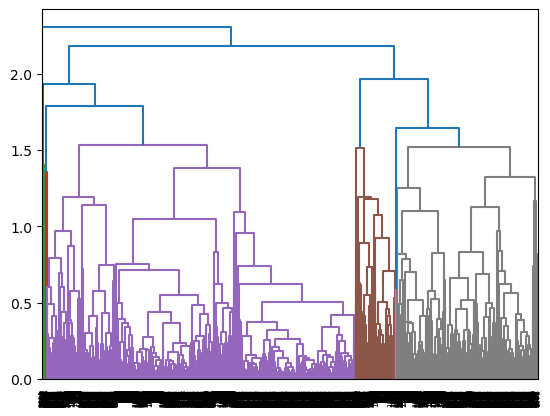

In [9]:
dendogram=sch.dendrogram(sch.linkage(ew1_n, method='complete'))

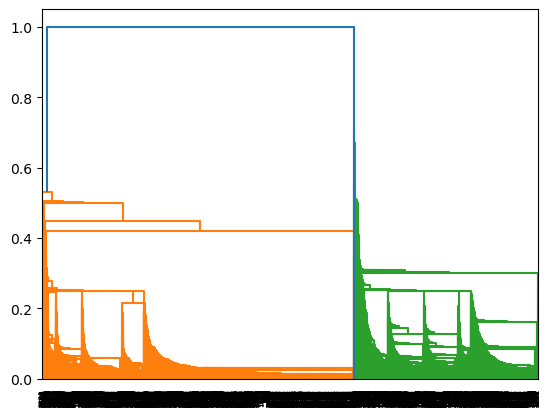

In [11]:
dendogram=sch.dendrogram(sch.linkage(ew1_n, method='single'))

In [12]:
hew = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='complete')

In [13]:
hew.fit_predict(ew1_n)

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [14]:
y_hew = hew.fit_predict(ew1_n)

In [16]:
ew['h_clusterid'] = y_hew

In [17]:
ew.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [19]:
ew.groupby(["h_clusterid"])["ID#"].apply(lambda x:tuple(x))

h_clusterid
0    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
1    (5, 12, 16, 17, 21, 36, 42, 53, 81, 82, 88, 95...
2    (8, 9, 10, 18, 19, 20, 22, 29, 30, 37, 39, 40,...
3                             (2032, 3257, 3606, 3617)
4    (202, 386, 804, 951, 1161, 1283, 1403, 1542, 1...
Name: ID#, dtype: object

# KMeans

In [36]:
ew=pd.read_csv("EastWestAirlines.csv")

In [37]:
ew.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [38]:
we_norm = norm_func(ew.iloc[:,1:])

In [39]:
from sklearn.cluster import KMeans

In [40]:
model_kmeans = KMeans(n_clusters=4)
model_kmeans.fit(we_norm)

KMeans(n_clusters=4)

In [41]:
model_kmeans.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [42]:
dw=pd.Series(model_kmeans.labels_)

In [43]:
ew["labels"]=pd.Series(model_kmeans.labels_)

In [44]:
ew.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [45]:
ew.groupby(["labels"])["ID#"].apply(lambda x:tuple(x))

labels
0    (1, 2, 3, 4, 6, 11, 13, 14, 15, 23, 24, 25, 26...
1    (8, 18, 22, 30, 37, 40, 43, 46, 48, 54, 58, 83...
2    (7, 31, 33, 45, 57, 59, 61, 68, 73, 74, 76, 78...
3    (5, 9, 10, 12, 16, 17, 19, 20, 21, 29, 36, 39,...
Name: ID#, dtype: object

In [49]:
ew[ew["ID#"].isin([5,9,12,17])]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,3
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,3
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,3


# Inferences

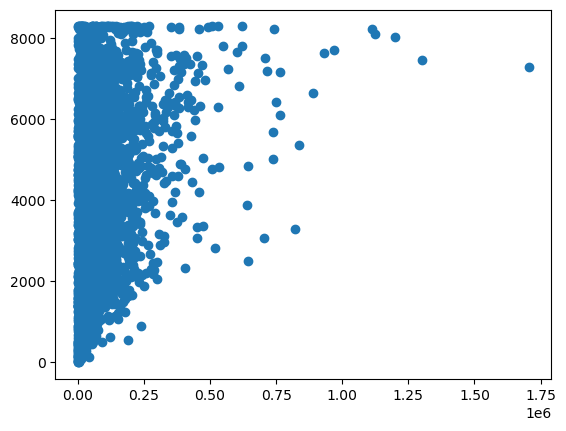

In [55]:
plt.scatter(ew["Balance"],ew["Days_since_enroll"],cmap=plt.cm.Accent)

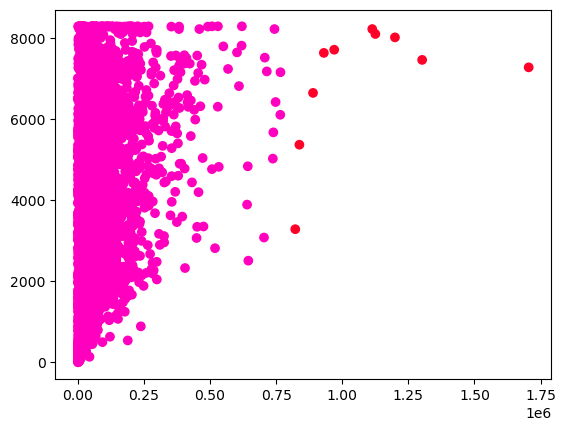

In [57]:
#using hierarchical
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage = "complete")
plt.scatter(ew["Balance"],ew["Days_since_enroll"],c=cluster.fit_predict(ew.iloc[:,[1,-4]]),cmap=plt.cm.gist_rainbow)

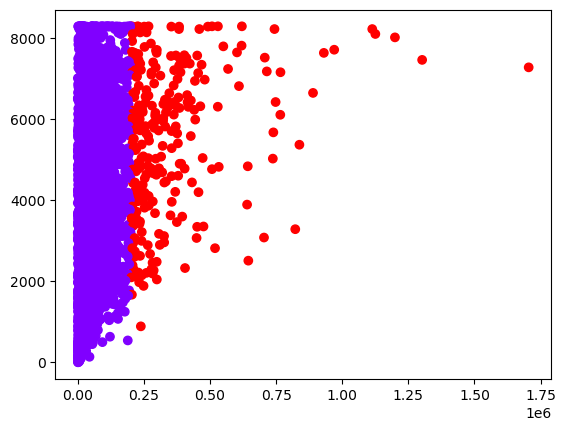

In [58]:
#using KMeans
model = KMeans(n_clusters = 2, max_iter=600, algorithm = 'auto')
model.fit(ew.iloc[:,[1,-4]])
plt.scatter(ew["Balance"],ew["Days_since_enroll"],c=model.labels_,cmap=plt.cm.rainbow)

# DBSCAN

In [51]:
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

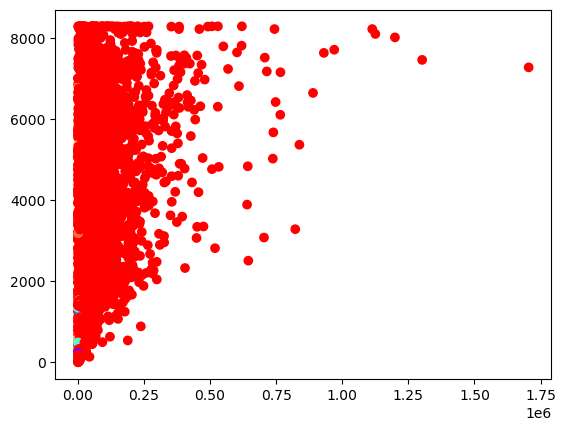

In [53]:
ds=DBSCAN(min_samples=3,eps=0.3)
class_pr=ds.fit_predict(ew.iloc[:,1:5])
plt.scatter(ew['Balance'],ew['Days_since_enroll'],c=class_pr,cmap=plt.cm.rainbow_r)

# finding the optimal number of clusters

In [59]:
df = pd.read_csv("EastWestAirlines.csv")

In [60]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [61]:
nc = [1,2,3,4,5,6,7,8,9]
iner = []
for i  in nc:
    km=KMeans(i)
    km.fit(df.iloc[:,[1,-2]])
    iner.append(km.inertia_)

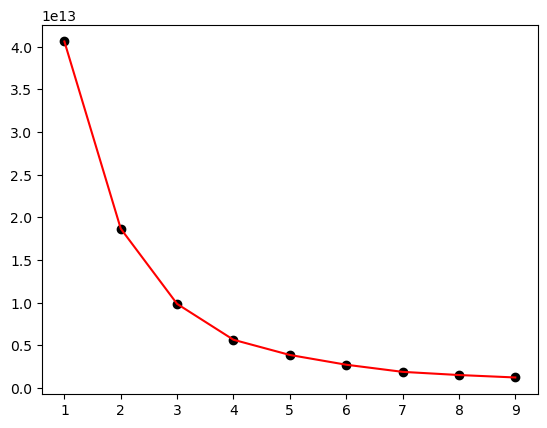

In [62]:
plt.plot(nc,iner,color="red")
plt.scatter(nc,iner,color="black")
plt.show()

# Silhouette_Score

In [63]:
from sklearn.metrics import silhouette_score as sil

In [64]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(df.iloc[:,[1,-2]])
    sc_score.append(sil(df.iloc[:,[1,-2]],y))

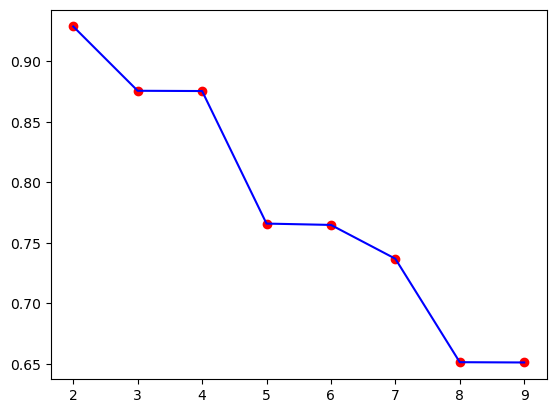

In [65]:
plt.plot(nc,sc_score,color="blue")
plt.scatter(nc,sc_score,color="red")
plt.show()